In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential

from art import tprint 

In [16]:
# Cargar dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

"""
Convierte los valores de los píxeles en las imágenes (originalmente en un rango de 0 a 255) a un rango de 0 a 1 dividiendo por 255.
Además, cambia el tipo de datos a float32, lo cual es más adecuado para cálculos numéricos en redes neuronales


n_samples: número de imágenes de entrenamiento.
height: altura de cada imagen (p. ej., 28 para MNIST).
width: ancho de cada imagen (p. ej., 28 para MNIST).
1: canal de color (escala de grises).
"""

(60000, 28, 28, 1)


'\nConvierte los valores de los píxeles en las imágenes (originalmente en un rango de 0 a 255) a un rango de 0 a 1 dividiendo por 255.\nAdemás, cambia el tipo de datos a float32, lo cual es más adecuado para cálculos numéricos en redes neuronales\n\n\nn_samples: número de imágenes de entrenamiento.\nheight: altura de cada imagen (p. ej., 28 para MNIST).\nwidth: ancho de cada imagen (p. ej., 28 para MNIST).\n1: canal de color (escala de grises).\n'

In [18]:
# Convertir etiquetas a formato categórico
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
# %% Crear un modelo CNN para clasificación
model = Sequential([
    # Capa convolucional con 32 filtros y tamaño de kernel 3x3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),  # MaxPooling para reducción de dimensionalidad
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Aplanar la salida para conectarla a capas densas
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Dropout para evitar sobreajuste
    layers.Dense(10, activation='softmax')  # 10 clases, función softmax para clasificación multiclase
])

   - **Capas Convolucionales**: Se empieza con 32 filtros en la primera capa convolucional para detectar características simples, luego se incrementa a 64 y 128 filtros para capturar características más complejas a medida que profundiza la red.
   - **MaxPooling**: Se emplean capas de `MaxPooling2D` para reducir la resolución de las imágenes después de cada capa convolucional. Esto reduce el número de parámetros y el tiempo de computación, además de ayudar a que el modelo sea más robusto a la translación de las características.
   - **Capa Flatten**: Después de las capas convolucionales, la salida es aplanada en un vector unidimensional para conectarse con las capas densas.
   - **Capa Densa**: Una capa densa de 128 neuronas con activación `ReLU` se utiliza para realizar la clasificación final de los dígitos.
   - **Capa de Salida**: La última capa densa tiene 10 neuronas, una para cada clase (dígitos del 0 al 9), con una función de activación `softmax` para obtener las probabilidades de cada clase.

- **Uso de MaxPooling**: Las capas de max pooling ayudan a reducir la dimensionalidad de las características extraídas por las capas convolucionales, lo que mejora la eficiencia del modelo y lo hace menos sensible a variaciones en la posición de las características dentro de la imagen.
- **Activación `softmax`**: La función `softmax` en la capa de salida permite que el modelo asigna probabilidades a cada una de las 10 clases posibles, lo que facilita la clasificación multiclase.


In [21]:
# %% Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# %% Entrenar el modelo
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/3
938/938 [==============================] - 41s 42ms/step - loss: 0.2625 - accuracy: 0.9180 - val_loss: 0.1082 - val_accuracy: 0.9698
Epoch 2/3
938/938 [==============================] - 40s 43ms/step - loss: 0.0873 - accuracy: 0.9738 - val_loss: 0.0594 - val_accuracy: 0.9827
Epoch 3/3
938/938 [==============================] - 39s 42ms/step - loss: 0.0627 - accuracy: 0.9804 - val_loss: 0.0509 - val_accuracy: 0.9843


In [22]:
# %% Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0509 - accuracy: 0.9843
Test accuracy: 0.9843


In [23]:
# %% Predicciones sobre el conjunto de prueba
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 3s 9ms/step


In [24]:
# %% Métricas de evaluación
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

tprint(f"Accuracy: {accuracy:.4f}")
tprint(f"Precision: {precision:.4f}")
tprint(f"Recall: {recall:.4f}")


    _                                                       ___       ___    ___   _  _    _____ 
   / \     ___   ___  _   _  _ __   __ _   ___  _   _  _   / _ \     / _ \  ( _ ) | || |  |___ / 
  / _ \   / __| / __|| | | || '__| / _` | / __|| | | |(_) | | | |   | (_) | / _ \ | || |_   |_ \ 
 / ___ \ | (__ | (__ | |_| || |   | (_| || (__ | |_| | _  | |_| | _  \__, || (_) ||__   _| ___) |
/_/   \_\ \___| \___| \__,_||_|    \__,_| \___| \__, |(_)  \___/ (_)   /_/  \___/    |_|  |____/ 
                                                |___/                                            

 ____                     _       _                     ___       ___    ___   _  _    _  _   
|  _ \  _ __   ___   ___ (_) ___ (_)  ___   _ __   _   / _ \     / _ \  ( _ ) | || |  | || |  
| |_) || '__| / _ \ / __|| |/ __|| | / _ \ | '_ \ (_) | | | |   | (_) | / _ \ | || |_ | || |_ 
|  __/ | |   |  __/| (__ | |\__ \| || (_) || | | | _  | |_| | _  \__, || (_) ||__   _||__   _|
|_|    |_|    \___| \___||_||__

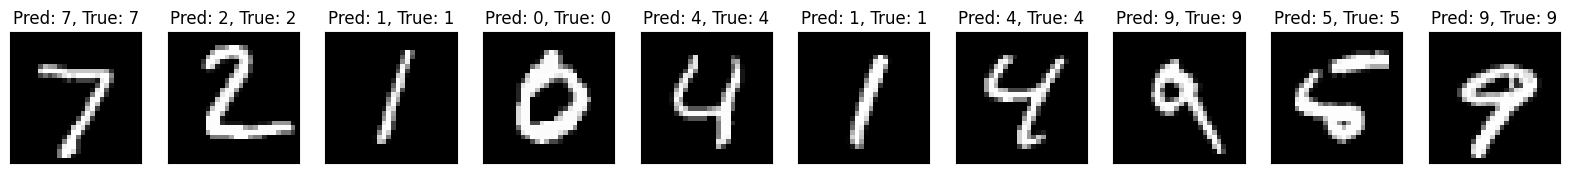

In [25]:

# %% Visualizar algunas predicciones
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}, True: {y_true_classes[i]}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
